## Polynomial Regression in Stonktastic
***

### Summary:
In Stonktastic, we use three machine learning algorithum: Polynomial Regression, Long-Term Short-Term Memory and Random Forest.

Linear Regression in its most basic form is a process of finding a straight line that best represents a series of points in a graph. Polynomial Regression is much the same only that we allow for various degrees above two. This type of machine learning algorithum will generate a formula and begin a series of test and changes until the R^2 value of the line is as low as the algorithum can make it. 

### Stonktastic's use of Polynomial Regression
Polynomial Regression in Stonktastic uses sklearn's following libraries for machine learning calculations:
- *linear_model* library for the core machine learning code as well as the ** and ** model for the pol
- *preprocessing* : for the *Polynomial* feature and the *Min Max Scaler* library.

##### Data Split
We split the data not by randomly selecting 80/20 of the data to fall under Train/Test but instead cut off the last 20% to be used as the testing data itself. 

##### Saving and Loading
To save the data off after our initial calculations are preformed we use the *Pickle* library and save off the results of any calculations to the SQL lite database.

### Variables and Optimization

#### Variables looked at
We use two sets of variables in the Polynomial Regression. This includes which data points and what level of polynomial to use for calculations. The value of each is done by ranking options with the results/time taken to preform calculations. 

#### Preping for Analysis

In [1]:
import sys
sys.path.append('../')

import stonkCode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampleNum = 200

#### Pull Optimized Data DataFrame

In [2]:
linRegOpt = stonkCode.optimization.runLinRegOptimization(stonkCode.config.stockToOpt)

Linear Regression Optimization
SNP | Lin Reg Optimize Variable   : SAR, RSI, MACDHist, BBMiddleBand, BBLowerBand, EMA, Chaikin, StochD, Close, Date
SNP | Lin Reg Optimizd Poly Value : 2


### Linear Regression Variables
We will be using the *Optimization* part of the script to look at the variables and graph the results of our choices

#### Exploring Subset of the Initial Variables

In [19]:
df = linRegOpt.subDf
df.sort_values(by='score', ascending=False, inplace=True)
df = df.reset_index(drop=True)

print(f"Optimized Subset for Polynomial Regression : {', '.join(linRegOpt.optSubSet)}")

Optimized Subset for Polynomial Regression : SAR, RSI, MACDHist, BBMiddleBand, BBLowerBand, EMA, Chaikin, StochD, Close, Date


#### Explore Variable Weight

In [5]:
linRegVariables = ["SAR","RSI","CCI","MACDHist", "BBUpperBand",
                    "BBMiddleBand","BBLowerBand","EMA", "Chaikin",
                    "StochK","StochD","WILLR"]
RowCount        = [0,0,0,0,0,0,0,0,0,0,0,0] 


linRegCounterDataframe = pd.DataFrame(RowCount,index=linRegVariables, columns=['Count'])


In [6]:
for idx, subsetList in enumerate(linRegOpt.subDf["subset"].values.tolist()):
    for variable in linRegVariables:
        if variable in subsetList:
            linRegCounterDataframe.at[variable,'Count'] = (  linRegCounterDataframe.at[variable, 'Count'] + int(len(linRegOpt.subDf) - idx)  )
            

In [25]:
linRegCounterDataframe.sort_values(by='Count', ascending=False, inplace=True)

#Normalize Data
lowestScore = linRegCounterDataframe['Count'].iloc[-1]
linRegCounterDataframe['Count'] = linRegCounterDataframe['Count'] - lowestScore

# Get percentages of Data
countSum = linRegCounterDataframe["Count"].sum()
linRegCounterDataframe['Count'] = linRegCounterDataframe['Count'].multiply((1/countSum)*100)

linRegCounterDataframe.drop(linRegCounterDataframe.tail(1).index, inplace = True) 


#### Exploring the relationship between number of variables and results

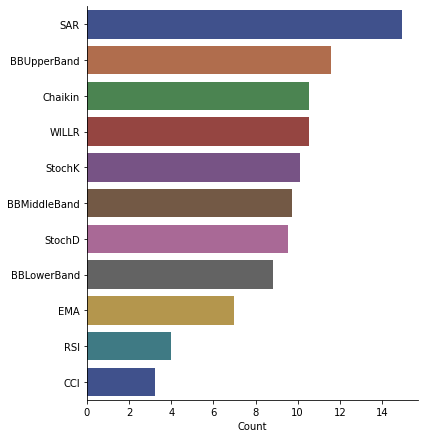

In [8]:
g = sns.catplot(
    data=linRegCounterDataframe, kind="bar",
    x="Count", y=linRegCounterDataframe.index.values, palette="dark", alpha=0.8, height=6,
    legend=False
)

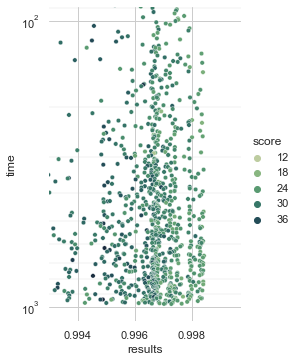

In [27]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.6, as_cmap=True)

g = sns.relplot(
    data=linRegOpt.subDf.sample(1000),
    x="results", y="time",hue="score",
    palette=cmap, s=20
)

g.set(xlim=(0.993, None))

g.set(yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

### Polynomial Variables
We will be using the *Optimization* part of the script to look at the variables and graph the results of our choices. We want to know if the additional time required by the algorithum to preform the calculation using different power levels is worth the additional time and resource cost associated. 

In [22]:
linRegOpt.polyDf

,polyOption,results,time,score
0,2,0.996036,0.036118,27.577256
1,1,0.995782,0.036338,27.403261
2,3,0.997070,0.050061,19.917101
3,4,0.995464,0.153335,6.492079
4,5,0.670843,0.269516,2.489065


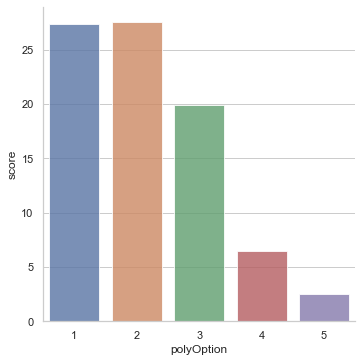

In [28]:
g = sns.catplot(data=linRegOpt.polyDf, x="polyOption", y="score",kind="bar", alpha=0.8)

### Results

##### Subsets
We found that the subset : "SAR, RSI, MACDHist, BBMiddleBand, BBLowerBand, EMA, Chaikin, StochD" preformed with the highest level of accuracy for the time required. This is the subset of variables that we use in the main calculations though if one required either higher levels of accuracy or a faster processing time, the variables could be tweeked.

##### Polynomial level
In the above graph, we can see that having a 2nd level polynomial is marginally better for the preformance of the system over a 1st level polynomial. Using a 3rd, 4th or 5th level polynomial sees a sharp drop in both the *Score* value.